# Brain Connectivity in Patients with Alzheimer's Disease

This is an attempt to look into functional connectivity in patients with Alzheimer's disease compared to healthy controls.

In [2]:
pip install networkx

     |████████████████████████████████| 1.6MB 22kB/s eta 0:00:011
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [53]:
import networkx as nx
import scipy.io as sio
import numpy as np
import pandas as pd
from scipy import stats 
import seaborn as sns

In [46]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 40000)
pd.set_option('display.max_rows', None)

In [3]:
def partial_corr(C):
    
    """
    source: https://gist.github.com/fabianp/9396204419c7b638d38f
    --------
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    --------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    --------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = np.linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = np.linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

In [5]:
bold_ad = sio.loadmat('BOLD_AD.mat') # load patients bold
bold_hc = sio.loadmat('BOLD_HC.mat') # load healthy controls

#What does squeeze do?
#bold_hc = sio.loadmat('/Users/katjaschueler/Desktop/brainhack/BOLD_HC.mat', squeeze_me=True) # in MATLAB, the struct array must be at least 2D, and we replicate that when we read into SciPy. If you want all length 1 dimensions squeezed out, try this

AD = bold_ad['BOLD']
HC = bold_hc['BOLD']

Get the shape of the BOLD time series (subjects x ROI activation x time)

In [5]:
AD.shape

(31, 83, 130)

In [6]:
HC.shape

(44, 83, 130)

Get data of one subject and turn in into a pandas dataframe

Calculate partial correations of the ROIs across time to get adjcency matrix

In [31]:
A1 = subj_1.corr()
A1

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,1.000000,0.734197,0.196664,-0.538086,0.044078,0.393890,-0.368566,0.008000,0.045398,-0.367465,...,-0.779907,0.151835,0.300046,0.820879,0.268088,-0.171505,-0.067720,-0.003886,0.067926,0.101652
1,0.734197,1.000000,0.237744,-0.524317,-0.230255,0.691974,-0.546638,0.137660,0.001313,-0.591373,...,-0.615812,0.013733,-0.081688,0.386842,-0.015586,-0.309582,0.151457,0.223766,0.131841,0.059506
2,0.196664,0.237744,1.000000,-0.373176,-0.702359,0.176601,-0.619481,0.206407,0.495221,-0.283751,...,-0.414009,-0.620279,-0.248009,0.043273,0.034013,0.019536,0.686975,0.637090,0.829641,-0.045394
3,-0.538086,-0.524317,-0.373176,1.000000,0.360144,-0.463261,0.635999,0.128209,-0.410609,0.603750,...,0.557111,0.377800,0.055258,-0.339346,0.006831,0.027961,-0.131559,-0.115489,-0.422894,0.247626
4,0.044078,-0.230255,-0.702359,0.360144,1.000000,-0.104969,0.720862,-0.144157,-0.189166,0.374625,...,0.014614,0.633989,0.358149,0.279778,-0.029144,0.310255,-0.523194,-0.481016,-0.687754,0.216302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.171505,-0.309582,0.019536,0.027961,0.310255,-0.177697,0.235887,-0.036818,0.385511,0.134853,...,-0.200239,0.023667,-0.060764,0.003145,-0.090639,1.000000,0.205078,0.071401,0.036870,0.384543
79,-0.067720,0.151457,0.686975,-0.131559,-0.523194,0.158583,-0.404174,0.217385,0.317261,-0.130030,...,-0.251250,-0.475354,-0.313677,-0.320680,0.070504,0.205078,1.000000,0.698228,0.735968,0.259034
80,-0.003886,0.223766,0.637090,-0.115489,-0.481016,0.206947,-0.411266,0.456052,0.289441,-0.210063,...,-0.269093,-0.205625,-0.370611,-0.129534,0.016922,0.071401,0.698228,1.000000,0.669241,0.059489
81,0.067926,0.131841,0.829641,-0.422894,-0.687754,0.239600,-0.522723,0.123633,0.576383,-0.325292,...,-0.306960,-0.685210,-0.301584,-0.114453,0.034853,0.036870,0.735968,0.669241,1.000000,-0.165714


Calculate partial correlations for all subjects:

In [30]:
adj_matrix_ad = []
for n in range(0, AD.shape[0]):
    
    subj = pd.DataFrame(AD[n])
    subj = subj.transpose()
    p = subj.corr()
    adj_matrix_ad.append(p)

In [31]:
pd.DataFrame(adj_matrix_ad[1])

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,1.000000,0.455856,0.406850,-0.098260,0.096349,0.270791,-0.007561,0.294874,0.255034,0.015238,...,-0.122612,0.052622,-0.186123,-0.420316,-0.299893,0.240606,-0.187720,-0.185455,-0.003998,0.196287
1,0.455856,1.000000,0.815943,-0.262531,0.670114,0.819041,0.284582,0.739633,0.400803,-0.497465,...,-0.467253,-0.223664,-0.085715,-0.473181,-0.129948,0.616137,-0.460574,-0.064101,-0.261956,0.429535
2,0.406850,0.815943,1.000000,-0.291861,0.426362,0.843377,-0.012211,0.586437,0.687359,-0.483147,...,-0.441350,-0.116626,-0.057929,-0.420013,-0.204560,0.661949,-0.217826,-0.030438,0.086345,0.719826
3,-0.098260,-0.262531,-0.291861,1.000000,0.183990,-0.175391,0.110543,0.087253,-0.404598,-0.111404,...,0.184863,0.140515,-0.167321,0.102163,0.065064,-0.035423,0.139719,0.218324,-0.273464,-0.395189
4,0.096349,0.670114,0.426362,0.183990,1.000000,0.599029,0.625105,0.685399,-0.023135,-0.586380,...,-0.423852,-0.236431,-0.199824,-0.317563,-0.010792,0.500348,-0.440680,0.084192,-0.618338,-0.065154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.240606,0.616137,0.661949,-0.035423,0.500348,0.524976,0.315023,0.376088,0.535842,-0.463148,...,-0.402766,0.013182,-0.190272,-0.342754,-0.125568,1.000000,0.199931,0.301537,0.132130,0.561829
79,-0.187720,-0.460574,-0.217826,0.139719,-0.440680,-0.426681,-0.295102,-0.489371,0.177342,0.289527,...,0.037489,0.228671,-0.012582,0.110641,-0.128754,0.199931,1.000000,0.484689,0.575382,0.305712
80,-0.185455,-0.064101,-0.030438,0.218324,0.084192,-0.037655,0.312726,0.077957,-0.034755,-0.046263,...,-0.414725,-0.251093,-0.329958,-0.299752,-0.096815,0.301537,0.484689,1.000000,-0.094924,0.085377
81,-0.003998,-0.261956,0.086345,-0.273464,-0.618338,-0.189032,-0.611001,-0.480499,0.559935,0.204631,...,0.276498,0.258641,0.328641,0.296253,-0.060348,0.132130,0.575382,-0.094924,1.000000,0.627300


calculate adjacency matrix for all healthy controls

In [32]:
adj_matrix_hc = []
for n in range(0, HC.shape[0]):
    
    subj = pd.DataFrame(HC[n])
    subj = subj.transpose()
    p = subj.corr()
    adj_matrix_hc.append(p)

In [33]:
pd.DataFrame(adj_matrix_hc[1])

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,1.000000,0.417899,-0.138595,0.090180,0.031962,0.150588,-0.122759,-0.001755,-0.385837,0.332931,...,-0.486704,0.451065,0.126156,0.679242,0.519266,0.239336,0.067575,0.099713,0.183430,-0.015752
1,0.417899,1.000000,0.194841,-0.464841,-0.611685,0.511247,-0.738669,0.266798,-0.218395,-0.263733,...,-0.210138,-0.096487,-0.271837,0.080505,-0.049840,-0.462129,0.124845,0.236594,0.037056,-0.397078
2,-0.138595,0.194841,1.000000,-0.504812,-0.271326,0.111884,-0.460893,0.396924,0.251382,-0.449544,...,-0.223249,-0.219925,-0.198250,-0.225827,-0.173941,-0.187550,0.487009,0.501065,0.352157,-0.080678
3,0.090180,-0.464841,-0.504812,1.000000,0.598887,-0.207586,0.687597,-0.359017,-0.095194,0.703703,...,-0.024699,0.425155,0.411694,0.396965,0.322501,0.687128,-0.029976,-0.451054,-0.009170,0.058133
4,0.031962,-0.611685,-0.271326,0.598887,1.000000,-0.072770,0.899879,-0.355218,0.187123,0.560944,...,-0.367383,0.353757,0.224367,0.514420,0.203738,0.637990,-0.268112,-0.282430,0.053909,0.408546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.239336,-0.462129,-0.187550,0.687128,0.637990,-0.164134,0.599644,-0.343428,0.002859,0.645789,...,-0.265079,0.492110,0.268563,0.477197,0.422693,1.000000,0.149078,-0.171614,0.273720,0.376462
79,0.067575,0.124845,0.487009,-0.029976,-0.268112,-0.080021,-0.318193,0.069238,0.068191,-0.189289,...,-0.219129,-0.022971,-0.101919,-0.081772,0.017194,0.149078,1.000000,0.365775,0.429013,-0.216798
80,0.099713,0.236594,0.501065,-0.451054,-0.282430,-0.084541,-0.418371,0.629678,-0.324797,-0.369841,...,-0.100854,0.081654,-0.019737,0.068823,0.298839,-0.171614,0.365775,1.000000,0.601467,0.212461
81,0.183430,0.037056,0.352157,-0.009170,0.053909,0.127174,-0.060946,0.210009,-0.083929,-0.118330,...,-0.287337,0.118266,0.066581,0.247592,0.356766,0.273720,0.429013,0.601467,1.000000,0.528257


# Graph Measures

In [36]:
mask = np.zeros_like(adj_matrix_hc[1], dtype=np.bool)
mask[np.triu_indices_from(adj_matrix_hc[1])] = True

In [37]:
adj_matrix_hc_masked = adj_matrix_hc[1].mask(mask)

In [48]:
for col in adj_matrix_hc_masked:
    adj_matrix_hc_masked[col].where(adj_matrix_hc_masked[col]>adj_matrix_hc_masked[col].quantile(0.8),0, inplace = True)

In [49]:
adj_matrix_hc_masked

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.41790,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.59889,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,0.00000,0.51125,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00

In [50]:
G = nx.Graph(adj_matrix_hc_masked)

In [39]:
G.edges()
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82))

In [40]:
%matplotlib inline

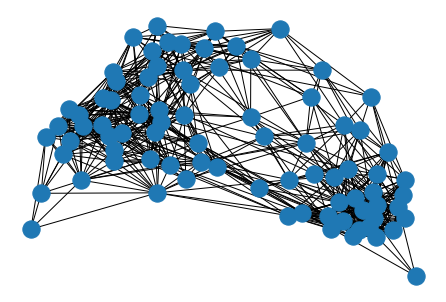

In [56]:
nx.draw_spring(G)

In [34]:
G = nx.Graph(adj_matrix_hc[1])

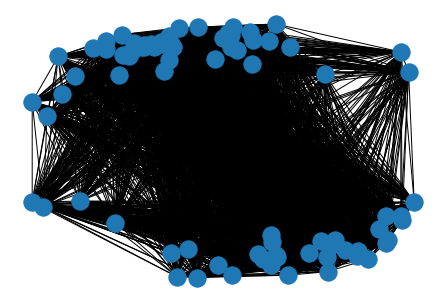

In [35]:
nx.draw(G)

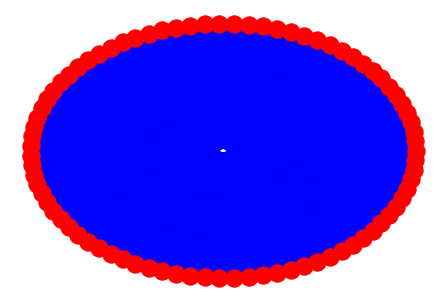

In [65]:
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

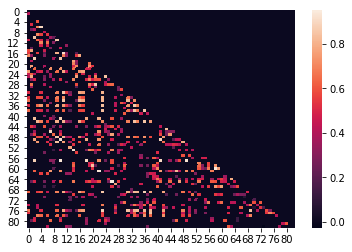

In [54]:
sns.heatmap(adj_matrix_hc_masked)